<a href="https://colab.research.google.com/github/AneesahAneesah/aneesah_INFO5731_Spring2021/blob/main/Inclass_exercise_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def insertarray(num,array_ref):

  for i in num:

    array_ref.append(i.text)

title=[]

for j in range(0,100,10):

  URL="http://citeseerx.ist.psu.edu/search?q=data+science&t=doc&sort=rlv&start="+str(j)
  pages=requests.get(URL,headers={'User-Agent':'Chrome/85.0.4183.121'})
  beau_soup = BeautifulSoup(pages.content, 'html.parser')
  insertarray(beau_soup.find_all('a', class_='remove doc_details'),title)

print(title)
df = pd.DataFrame (title,columns=['title'])

['\nData Streams: Algorithms and Applications\n                  ', '\n                  Bayesian Data Analysis\n                  ', '\n                  Voronoi diagrams -- a survey of a fundamental geometric data structure\n                  ', '\n                  From Data Mining to Knowledge Discovery in Databases.\n                  ', '\n                  Survey of clustering algorithms\n                  ', '\n                  Thresholding of statistical maps in functional neuroimaging using the false discovery rate.\n                  ', '\n                  Maintaining knowledge about temporal intervals\n                  ', '\n                  Status quo bias in decision making\n                  ', '\n                  Rough Sets.\n                  ', '\n                  Modeling TCP Throughput: A Simple Model and its Empirical Validation\n                  ', '\n                  Compressive sampling\n                  ', '\n                  Search and replication in

In [9]:
pip install pyLDAvis

     |████████████████████████████████| 1.7MB 8.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=14e95937c013f5af78861224d84da078e23186e364df28ae33be14900be2792f
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use']) 

In [20]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  
data_words = list(sent_to_words(titles))
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

print(data_words[:1])
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []

    for n in texts:

        doc = nlp(" ".join(n)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

    return texts_out

[['data', 'streams', 'algorithms', 'and', 'applications']]


In [22]:
def m_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

data_words = remove_stopwords(data_words)
data_bigrams = m_bigrams(data_words)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lem = lemmatization(data_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lem[:1])
id_word = corpora.Dictionary(data_lem)

texts = data_lem
corpus = [id_word.doc2bow(text) for text in texts]

print(corpus[:1])
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id_word,
                                           num_topics=100, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[[]]
[[]]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


[(36,
  '0.003*"application" + 0.003*"various" + 0.003*"probe" + 0.003*"inspire" + '
  '0.003*"family" + 0.003*"support" + 0.003*"optimisation" + 0.003*"interface" '
  '+ 0.003*"course" + 0.003*"study"'),
 (15,
  '0.003*"application" + 0.003*"various" + 0.003*"probe" + 0.003*"inspire" + '
  '0.003*"family" + 0.003*"support" + 0.003*"optimisation" + 0.003*"interface" '
  '+ 0.003*"course" + 0.003*"study"'),
 (20,
  '0.003*"application" + 0.003*"various" + 0.003*"probe" + 0.003*"inspire" + '
  '0.003*"family" + 0.003*"support" + 0.003*"optimisation" + 0.003*"interface" '
  '+ 0.003*"course" + 0.003*"study"'),
 (7,
  '0.003*"application" + 0.003*"various" + 0.003*"probe" + 0.003*"inspire" + '
  '0.003*"family" + 0.003*"support" + 0.003*"optimisation" + 0.003*"interface" '
  '+ 0.003*"course" + 0.003*"study"'),
 (42,
  '0.003*"application" + 0.003*"various" + 0.003*"probe" + 0.003*"inspire" + '
  '0.003*"family" + 0.003*"support" + 0.003*"optimisation" + 0.003*"interface" '
  '+ 0.003*"cou

**Summarization of LDA Topics**

The LDA algorithm actually performs more than just text summarization; it also discovers recurring topics in a document collection. 
By extracting a few topics common to review groups, discover the features of the product.
Reorganize pictures based on the topics associated with their description texts.
Retrieving defetcts of surveys
Retrieving information efficiently using customized linguistics
Detecting the common topics in a newspaper helps to identify the journal orientation and the trend of the day.
Computer unified assistance for statistical biomedicine architecture
Processing medical information using NLP
Generating current engineering software models using NLP
Base for Art labelling platform technique using NLP



In [28]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [31]:
def preprocess_data(docu_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    tokenizer = RegexpTokenizer(r'\w+')
    english_stopwords = set(stopwords.words('english'))
    porter_stemmer = PorterStemmer()
    texts = []

    for i in docu_set:

        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in english_stopwords]
        stemmed_tokens = [porter_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
        
    return texts

In [32]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    dictionary = corpora.Dictionary(doc_clean)
    document_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,document_term_matrix

In [33]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,document_term_matrix=prepare_corpus(doc_clean)
    lsamodel = LsiModel(document_term_matrix, num_topics=number_of_topics, id2word = dictionary)  
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [34]:
def compute_coherence(dictionary, document_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []

    for num_topics in range(start, stop, step):

      model = LsiModel(document_term_matrix, num_topics, id2word = dictionary)  # train model
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
      
    return model_list, coherence_values

In [37]:
def graph(doc_clean,start, stop, step):

    dictionary,document_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence(dictionary, document_term_matrix,doc_clean,stop, start, step)
    
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Topics number")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

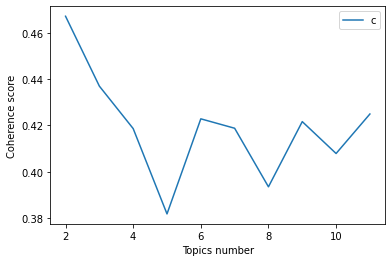

In [38]:

start,stop,step=2,12,1
clean_text=preprocess_data(titles)
graph(clean_text,start,stop,step)

In [40]:
num=20
words=100
text=preprocess_data(titles)
model=create_gensim_lsa_model(text,num,words)

[(0, '0.763*"data" + 0.587*"scienc" + 0.077*"big" + 0.061*"comput" + 0.057*"1" + 0.056*"statist" + 0.051*"new" + 0.047*"educ" + 0.045*"peer" + 0.044*"earth" + 0.044*"write" + 0.044*"review" + 0.036*"analyt" + 0.036*"vision" + 0.035*"program" + 0.035*"introductori" + 0.035*"cours" + 0.035*"univers" + 0.031*"make" + 0.031*"editori" + 0.030*"technolog" + 0.030*"peopl" + 0.029*"autom" + 0.025*"analysi" + 0.025*"intens" + 0.025*"undergradu" + 0.025*"georg" + 0.025*"mason" + 0.025*"student" + 0.025*"journal" + 0.024*"develop" + 0.022*"larg" + 0.022*"page" + 0.022*"oceanographi" + 0.022*"gener" + 0.022*"class" + 0.021*"decis" + 0.021*"relationship" + 0.021*"origin" + 0.021*"driven" + 0.021*"articl" + 0.020*"thrust" + 0.020*"area" + 0.020*"teach" + 0.020*"parallel" + 0.020*"visual" + 0.020*"busi" + 0.020*"r" + 0.020*"requir" + 0.020*"insight" + 0.020*"climat" + 0.019*"e" + 0.019*"toward" + 0.019*"cognit" + 0.019*"support" + 0.018*"foundat" + 0.016*"research" + 0.015*"discoveri" + 0.015*"challe

In [ ]:
for num, cv in zip(range(2, 60, 6), coherence_values):
  print("Num Topics:", num, " - Coherence Value:", round(cv, 4))

In [ ]:
pprint(LsiModel.print_topics())

**Summarization of LSA Model**

The LSI gives the weightage of the documents belonging to different topics. Summarization is done by selecting the top N documents from each topic depending on the weightage.
Reduce the dimensionality of the original text-based dataset.
It helps us understand what each topic is encoding.
Analyze word association in text corpus.
Find relations between terms.
Clinical architecture extraction
Summary of detection techniques
LSA has been used to assist in performing prior art searches for patents.
Extraction of medical and suicidal elctronic information
NLP for sentimental review
NLP for health and sytematic reviews
Automatic detection and text processing of clinical information
Clinical information extraction using deep learning
NLP for semenatical representation of survey text
Review of information retrieval using NLP
Clinical architecture extraction
Summary of detection techniques

**Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.**

Latent Semantic Analysis, or LSA, is one of the foundational techniques in topic modeling. The core idea is to take a matrix of what we have — documents and terms — and decompose it into a separate document-topic matrix and a topic-term matrix. LDA Topic modeling is a form of unsupervised machine learning that allows for efficient processing of large collections of data. 
LSA is quick and efficient to use, but it does have a few primary drawbacks:
lack of interpretable embeddings, the topics are, and the components may be arbitrarily positive/negative
Need for really large set of documents and vocabulary to get accurate results less efficient representation.
Latent Dirichlet Allocation (LDA), and this model can be used effectively on a variety of document types such as collections of news articles, policy documents, social media posts or tweets.
These two topic model algorithms are good in their own ways and we thinkt that these "just work". Topic models are actually quite interpretable and much more straightforward to diagnose, tune, and evaluate. As they are good in their own ways, LDA seemed a bit easier and better. 